In [644]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
import seaborn as sns

In [645]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   ------------------------- -------------- 6.3/9.8 MB 22.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 24.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [646]:
import statsmodels.api as sm

### Order Payments Dataset

In [606]:
dfOrderPayment = pd.read_csv(r'C:\git-on33\On33-S14\on33-python-s14-analise-de-dados\exercicios\para-casa\olist_order_payments_dataset.csv')
dfOrderPayment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [607]:
dfOrderPayment.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [608]:
# Vamos entender um pouquinho melhor dos nossos dados
dfOrderPayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [609]:
## order_id	payment_sequential	payment_type	payment_installments	payment_value
columns_drop = ['payment_sequential']
dfOrderPayment = dfOrderPayment.drop(columns_drop, axis=1)
dfOrderPayment

,order_id,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,credit_card,2,128.45
...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,credit_card,5,369.54


### Order Reviews Dataset

In [610]:
dfOrderReview = pd.read_csv(r'C:\git-on33\On33-S14\on33-python-s14-analise-de-dados\exercicios\para-casa\olist_order_reviews_dataset.csv')
dfOrderReview

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [611]:
dfOrderReview.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,08528f70f579f0c830189efc523d2182,df56136b8031ecd28e200bb18e6ddb2e,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [612]:
dfOrderReview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [613]:
dfOrderReview = dfOrderReview.dropna(axis=0)
dfOrderReview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9839 entries, 9 to 99200
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                9839 non-null   object
 1   order_id                 9839 non-null   object
 2   review_score             9839 non-null   int64 
 3   review_comment_title     9839 non-null   object
 4   review_comment_message   9839 non-null   object
 5   review_creation_date     9839 non-null   object
 6   review_answer_timestamp  9839 non-null   object
dtypes: int64(1), object(6)
memory usage: 614.9+ KB


In [614]:
columns_drop = ['review_answer_timestamp', 'review_id']
dfOrderReview = dfOrderReview.drop(columns_drop, axis=1)
dfOrderReview

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date
9,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00
15,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00
19,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15 00:00:00
22,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10 00:00:00
34,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07 00:00:00
...,...,...,...,...,...
99187,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22 00:00:00
99192,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04 00:00:00
99196,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30 00:00:00
99197,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05 00:00:00


In [615]:
# Vamos transformar nossas colunas de data (que estão como string) em data: 
dfOrderReview['review_creation_date'] = pd.to_datetime(dfOrderReview['review_creation_date'])

# Agora sim, vamos criar uma coluna de data e de mês!
dfOrderReview['reference_date'] = dfOrderReview['review_creation_date'].dt.date
dfOrderReview['reference_YearMonth'] = dfOrderReview['review_creation_date'].dt.strftime('%Y-%m')
dfOrderReview

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,reference_date,reference_YearMonth
9,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22,2018-05-22,2018-05
15,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23,2018-05-23,2018-05
19,583174fbe37d3d5f0d6661be3aad1786,1,Não chegou meu produto,Péssimo,2018-08-15,2018-08-15,2018-08
22,4fc44d78867142c627497b60a7e0228a,5,Ótimo,Loja nota 10,2018-07-10,2018-07-10,2018-07
34,37e7875cdce5a9e5b3a692971f370151,4,Muito bom.,Recebi exatamente o que esperava. As demais en...,2018-06-07,2018-06-07,2018-06
...,...,...,...,...,...,...,...
99187,16cbf959cfdb88c47ee2a29303547ec2,5,Nota máxima!,"Muito obrigado,\r\n\r\nExcelente atendimento,b...",2018-05-22,2018-05-22,2018-05
99192,bd78f91afbb1ecbc6124974c5e813043,4,👍,Aprovado!,2018-07-04,2018-07-04,2018-07
99196,0ebf8e35b9807ee2d717922d5663ccdb,5,muito bom produto,"Ficamos muito satisfeitos com o produto, atend...",2018-06-30,2018-06-30,2018-06
99197,b7467ae483dbe956fe9acdf0b1e6e3f4,3,Não foi entregue o pedido,Bom dia \r\nDas 6 unidades compradas só recebi...,2018-06-05,2018-06-05,2018-06


### Orders Dataset

In [616]:
dfOrders = pd.read_csv(r'C:\git-on33\On33-S14\on33-python-s14-analise-de-dados\exercicios\para-casa\olist_orders_dataset.csv')
dfOrders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [617]:
dfOrders.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [618]:
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [619]:
columns_drop = ['customer_id', 'order_purchase_timestamp', 'order_delivered_carrier_date']
dfOrders = dfOrders.drop(columns_drop, axis=1)
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   order_status                   99441 non-null  object
 2   order_approved_at              99281 non-null  object
 3   order_delivered_customer_date  96476 non-null  object
 4   order_estimated_delivery_date  99441 non-null  object
dtypes: object(5)
memory usage: 3.8+ MB


In [620]:
# DATA DA COMPRA
dfOrders['order_approved_at'] = pd.to_datetime(dfOrders['order_approved_at'])

dfOrders['DataFaturamento'] = dfOrders['order_approved_at'].dt.normalize()


# DATA DA ENTREGA
dfOrders['order_delivered_customer_date'] = pd.to_datetime(dfOrders['order_delivered_customer_date'])

dfOrders['DataEntrega'] = dfOrders['order_delivered_customer_date'].dt.normalize()

# DATA ESTIMADA PA ENTREGA
dfOrders['order_estimated_delivery_date'] = pd.to_datetime(dfOrders['order_estimated_delivery_date'])

dfOrders['DataEntEstimada'] = dfOrders['order_estimated_delivery_date'].dt.normalize()

dfOrders

,order_id,order_status,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,DataFaturamento,DataEntrega,DataEntEstimada
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 11:07:15,2017-10-10 21:25:13,2017-10-18,2017-10-02,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-26 03:24:27,2018-08-07 15:27:45,2018-08-13,2018-07-26,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:55:23,2018-08-17 18:06:29,2018-09-04,2018-08-08,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:45:59,2017-12-02 00:28:42,2017-12-15,2017-11-18,2017-12-02,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 22:20:29,2018-02-16 18:17:02,2018-02-26,2018-02-13,2018-02-16,2018-02-26
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,2017-03-09,2017-03-17,2017-03-28
99437,63943bddc261676b46f01ca7ac2f7bd8,delivered,2018-02-06 13:10:37,2018-02-28 17:37:56,2018-03-02,2018-02-06,2018-02-28,2018-03-02
99438,83c1379a015df1e13d02aae0204711ab,delivered,2017-08-27 15:04:16,2017-09-21 11:24:17,2017-09-27,2017-08-27,2017-09-21,2017-09-27
99439,11c177c8e97725db2631073c19f07b62,delivered,2018-01-08 21:36:21,2018-01-25 23:32:54,2018-02-15,2018-01-08,2018-01-25,2018-02-15


In [621]:
columns_drop = ['order_approved_at', 'order_delivered_customer_date', 'order_estimated_delivery_date']
dfOrders = dfOrders.drop(columns_drop, axis=1)
dfOrders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         99441 non-null  object        
 1   order_status     99441 non-null  object        
 2   DataFaturamento  99281 non-null  datetime64[ns]
 3   DataEntrega      96476 non-null  datetime64[ns]
 4   DataEntEstimada  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(2)
memory usage: 3.8+ MB


### Joins

In [622]:
dfJoinOrders = pd.merge(dfOrderPayment, dfOrderReview, on=['order_id'], how='inner')
dfJoinOrders

,order_id,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,reference_date,reference_YearMonth
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-10,2018-05
1,298fcdf1f73eb413e4d26d01b25bc1cd,credit_card,2,96.12,5,10,Muito bom!!\r\n,2018-05-15,2018-05-15,2018-05
2,1f78449c87a54faf9e96e88ba1491fa9,credit_card,6,341.09,5,Muito bom,Gostei,2018-07-29,2018-07-29,2018-07
3,616105c9352a9668c38303ad44e056cd,credit_card,1,75.78,2,Regular,Comprei 2 produtos chegou apenas 1. Aguardo re...,2018-06-22,2018-06-22,2018-06
4,79da3f5fe31ad1e454f06f95dc032ad5,credit_card,1,98.94,5,recomendo,ESTOU MUITO SATISFEITA COM OS PRODUTOS E ATEND...,2018-06-14,2018-06-14,2018-06
...,...,...,...,...,...,...,...,...,...,...
10217,2ab10ab526351fd3b05219e9eb4f7d9f,credit_card,8,366.73,5,recomendo,"produto veio antes do prazo, muito bem embalad...",2018-06-21,2018-06-21,2018-06
10218,31b39339d93a6949e2f2addf798d8904,credit_card,1,114.49,5,Perfeito!,"Produto de ótima qualidade, bem embalado e ent...",2018-08-01,2018-08-01,2018-08
10219,93c244c6bb63cafcde3117a2b2a5e151,credit_card,10,195.86,2,Embalagem horrorosa,O produto vendido pela targaryen chegou em uma...,2018-05-11,2018-05-11,2018-05
10220,38d11c87fc409de31e930084abb0c7a4,credit_card,7,91.03,5,MUITO BOA AMERICANA,Ótima rápida na entrega OBRIGADO,2018-08-25,2018-08-25,2018-08


In [623]:
dfJoinOrdersII = pd.merge(dfJoinOrders, dfOrders, on=['order_id'], how='inner')
dfJoinOrdersII

,order_id,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,reference_date,reference_YearMonth,order_status,DataFaturamento,DataEntrega,DataEntEstimada
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-10,2018-05,delivered,2018-04-25,2018-05-09,2018-05-22
1,298fcdf1f73eb413e4d26d01b25bc1cd,credit_card,2,96.12,5,10,Muito bom!!\r\n,2018-05-15,2018-05-15,2018-05,delivered,2018-05-07,2018-05-14,2018-05-23
2,1f78449c87a54faf9e96e88ba1491fa9,credit_card,6,341.09,5,Muito bom,Gostei,2018-07-29,2018-07-29,2018-07,delivered,2018-07-23,2018-07-28,2018-08-14
3,616105c9352a9668c38303ad44e056cd,credit_card,1,75.78,2,Regular,Comprei 2 produtos chegou apenas 1. Aguardo re...,2018-06-22,2018-06-22,2018-06,delivered,2018-06-11,2018-06-21,2018-06-29
4,79da3f5fe31ad1e454f06f95dc032ad5,credit_card,1,98.94,5,recomendo,ESTOU MUITO SATISFEITA COM OS PRODUTOS E ATEND...,2018-06-14,2018-06-14,2018-06,delivered,2018-06-05,2018-06-13,2018-07-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10217,2ab10ab526351fd3b05219e9eb4f7d9f,credit_card,8,366.73,5,recomendo,"produto veio antes do prazo, muito bem embalad...",2018-06-21,2018-06-21,2018-06,delivered,2018-06-13,2018-06-20,2018-07-03
10218,31b39339d93a6949e2f2addf798d8904,credit_card,1,114.49,5,Perfeito!,"Produto de ótima qualidade, bem embalado e ent...",2018-08-01,2018-08-01,2018-08,delivered,2018-07-29,2018-07-31,2018-08-02
10219,93c244c6bb63cafcde3117a2b2a5e151,credit_card,10,195.86,2,Embalagem horrorosa,O produto vendido pela targaryen chegou em uma...,2018-05-11,2018-05-11,2018-05,delivered,2018-05-03,2018-05-10,2018-05-22
10220,38d11c87fc409de31e930084abb0c7a4,credit_card,7,91.03,5,MUITO BOA AMERICANA,Ótima rápida na entrega OBRIGADO,2018-08-25,2018-08-25,2018-08,delivered,2018-08-17,2018-08-24,2018-09-03


In [624]:
dfJoinOrdersII.to_csv('PedidosOlist.csv', index=False)

### Analisando os Dados

In [625]:
dfJoinOrdersII.head()

,order_id,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,reference_date,reference_YearMonth,order_status,DataFaturamento,DataEntrega,DataEntEstimada
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-10,2018-05,delivered,2018-04-25,2018-05-09,2018-05-22
1,298fcdf1f73eb413e4d26d01b25bc1cd,credit_card,2,96.12,5,10,Muito bom!!\r\n,2018-05-15,2018-05-15,2018-05,delivered,2018-05-07,2018-05-14,2018-05-23
2,1f78449c87a54faf9e96e88ba1491fa9,credit_card,6,341.09,5,Muito bom,Gostei,2018-07-29,2018-07-29,2018-07,delivered,2018-07-23,2018-07-28,2018-08-14
3,616105c9352a9668c38303ad44e056cd,credit_card,1,75.78,2,Regular,Comprei 2 produtos chegou apenas 1. Aguardo re...,2018-06-22,2018-06-22,2018-06,delivered,2018-06-11,2018-06-21,2018-06-29
4,79da3f5fe31ad1e454f06f95dc032ad5,credit_card,1,98.94,5,recomendo,ESTOU MUITO SATISFEITA COM OS PRODUTOS E ATEND...,2018-06-14,2018-06-14,2018-06,delivered,2018-06-05,2018-06-13,2018-07-12


#### Qual a forma de pagto mais frequente entre os clientes?

In [626]:
dfJoinOrdersII['payment_type'].unique()

array(['credit_card', 'voucher', 'boleto', 'debit_card', 'not_defined'],
      dtype=object)

In [627]:
dfJoinOrdersII['payment_type'].value_counts()

payment_type
credit_card    7624
boleto         1771
voucher         533
debit_card      292
not_defined       2
Name: count, dtype: int64

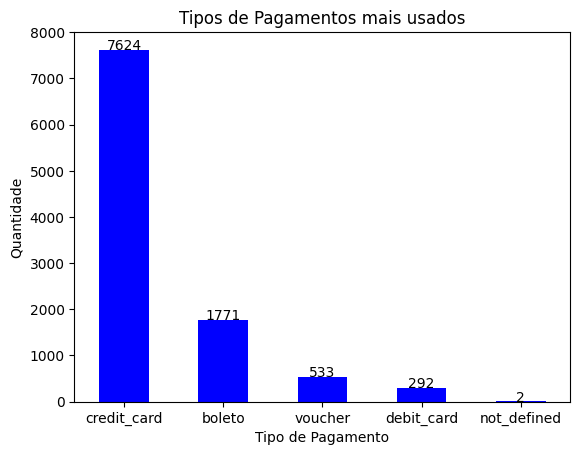

In [628]:
PaymentType = dfJoinOrdersII['payment_type'].value_counts()

#criando o grafico
barras = PaymentType.plot.bar(color='blue')

#configurações
plt.xlabel('Tipo de Pagamento')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Tipos de Pagamentos mais usados')

# Adicionar rótulos nos graficos
for i, v in enumerate(PaymentType):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

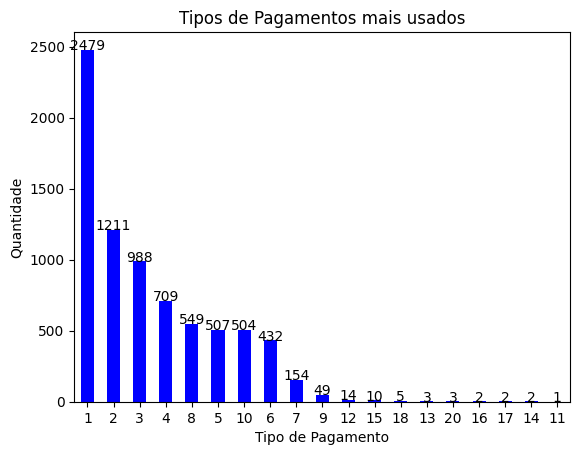

In [629]:
## Notei que os clientes tem preferencia por pagar com o Cartao de Credito, então agora, veremos de quantas vezes eles costumam parcelar.
CreditCard = dfJoinOrdersII[dfJoinOrdersII['payment_type'].str.contains('credit_card', case=False, na=False)]

Installments = CreditCard['payment_installments'].value_counts()

#criando o grafico
barras = Installments.plot.bar(color='blue')

#configurações
plt.xlabel('Tipo de Pagamento')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Tipos de Pagamentos mais usados')

# Adicionar rótulos nos graficos
for i, v in enumerate(Installments):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

In [630]:
## Mesmo os clientes preferindo pagar no cartão de crédito, percebemos que eles passam à vista.

#### As entregas estão sendo feitas dentro do prazo?

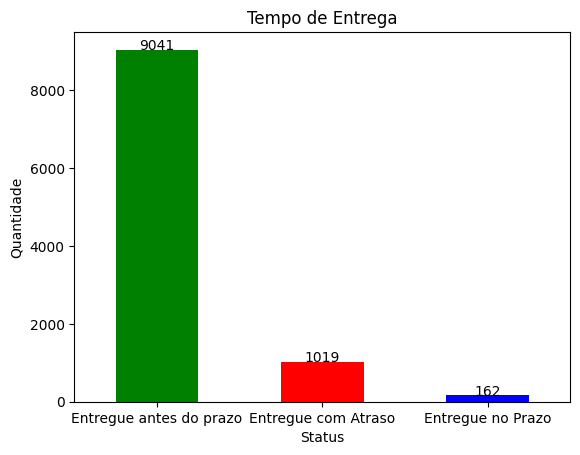

In [631]:
dfJoinOrdersII['Difference'] = (dfJoinOrdersII['DataEntEstimada'] - dfJoinOrdersII['DataEntrega']).dt.days


dfJoinOrdersII['DeliveryStatus'] = np.where(dfJoinOrdersII['Difference'] > 0, 'Entregue antes do prazo',
                                 np.where(dfJoinOrdersII['Difference'] == 0, 'Entregue no Prazo',
                                          'Entregue com Atraso'))


#criando o grafico
Diff = dfJoinOrdersII['DeliveryStatus'].value_counts()

cores = ['green', 'red', 'blue']
barras = Diff.plot.bar(color=cores)

#configurações
plt.xlabel('Status')
plt.xticks(rotation=0)
plt.ylabel('Quantidade')
plt.title('Tempo de Entrega')

# Adicionar rótulos nos graficos
for i, v in enumerate(Diff):
    barras.text(i, v + 0.01, f'{v}', color='black', ha='center')

plt.show()

### O tempo da entrega influencia na nota?

In [632]:
# Criando a nova coluna 'InTime'
dfJoinOrdersII['InTime'] = dfJoinOrdersII['Difference'].apply(lambda x: 1 if x >= 0 else 0)
dfJoinOrdersII.head()

,order_id,payment_type,payment_installments,payment_value,review_score,review_comment_title,review_comment_message,review_creation_date,reference_date,reference_YearMonth,order_status,DataFaturamento,DataEntrega,DataEntEstimada,Difference,DeliveryStatus,InTime
0,b81ef226f3fe1789b1e8b2acac839d17,credit_card,8,99.33,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-10,2018-05,delivered,2018-04-25,2018-05-09,2018-05-22,13.0,Entregue antes do prazo,1
1,298fcdf1f73eb413e4d26d01b25bc1cd,credit_card,2,96.12,5,10,Muito bom!!\r\n,2018-05-15,2018-05-15,2018-05,delivered,2018-05-07,2018-05-14,2018-05-23,9.0,Entregue antes do prazo,1
2,1f78449c87a54faf9e96e88ba1491fa9,credit_card,6,341.09,5,Muito bom,Gostei,2018-07-29,2018-07-29,2018-07,delivered,2018-07-23,2018-07-28,2018-08-14,17.0,Entregue antes do prazo,1
3,616105c9352a9668c38303ad44e056cd,credit_card,1,75.78,2,Regular,Comprei 2 produtos chegou apenas 1. Aguardo re...,2018-06-22,2018-06-22,2018-06,delivered,2018-06-11,2018-06-21,2018-06-29,8.0,Entregue antes do prazo,1
4,79da3f5fe31ad1e454f06f95dc032ad5,credit_card,1,98.94,5,recomendo,ESTOU MUITO SATISFEITA COM OS PRODUTOS E ATEND...,2018-06-14,2018-06-14,2018-06,delivered,2018-06-05,2018-06-13,2018-07-12,29.0,Entregue antes do prazo,1


Teste T de Avaliação (Unicaudal)
Estatística T: -42.32105207747439
Valor P (Unicaudal): 1.262344046649296e-243


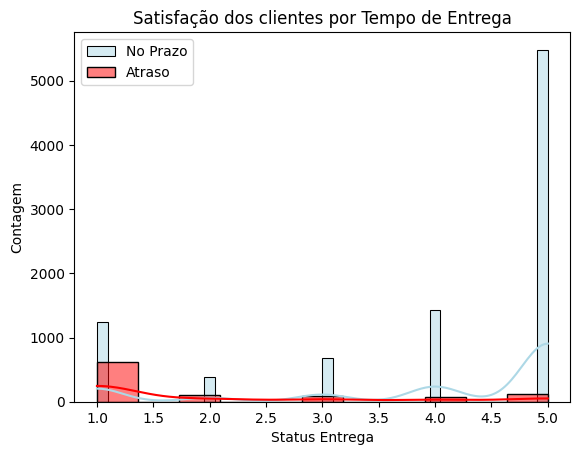

Não rejeitamos a hipótese nula: Clientes que recebem suas compras No Prazo tendem a ficar mais Satisfeitos.


In [650]:
# Amostras
inTime = dfJoinOrdersII[dfJoinOrdersII['InTime'] == 1]['review_score'].dropna()
late = dfJoinOrdersII[dfJoinOrdersII['InTime'] == 0]['review_score'].dropna()

# Teste T - Hipótese Unicaudal (mais satisfeitos ganham mais)
estatistica_t, valor_p_bicaudal = ttest_ind(late, inTime, equal_var=False)

# Dividindo o valor-p por 2 para o teste unicaudal
valor_p_unicaudal = valor_p_bicaudal / 2

print("Teste T de Avaliação (Unicaudal)")
print(f"Estatística T: {estatistica_t}")
print(f"Valor P (Unicaudal): {valor_p_unicaudal}")

# Gráfico
sns.histplot(inTime, color='lightblue', label='No Prazo', kde=True)
sns.histplot(late, color='red', label='Atraso', kde=True)

# Rótulos
plt.legend()
plt.title("Satisfação dos clientes por Tempo de Entrega")
plt.xlabel("Status Entrega")
plt.ylabel("Contagem")
plt.show()

# Interpretação
if estatistica_t > 0 and valor_p_unicaudal < 0.05:
    print("Rejeitamos a hipótese nula: Não há evidência suficiente para afirmar que os clientes mais satisfeitos recebem a compra No Prazo.")
else:
    print("Não rejeitamos a hipótese nula: Clientes que recebem suas compras No Prazo tendem a ficar mais Satisfeitos.")
